In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/customer_segmentation.csv')

In [5]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Occupation,Marital_Status,Education_Level,Location,Policy_Type,Coverage_Amount,Premium_Amount,Policy_Tenure_Years,Claim_History,Payment_Preferences,Customer_Support_Tickets,Marketing_Engagement,Customer_Feedback,Risk_Appetite,Renewal_Behavior
0,1001,37,Male,Low,Business Owner,Married,Master,Urban,Health,72282,1305,2,No,Monthly,0,High,Negative,Low,Late
1,1002,58,Male,High,Teacher,Divorced,Master,Suburban,Health,56940,831,10,No,Monthly,1,Medium,Neutral,High,On Time
2,1003,48,Male,High,Engineer,Single,High School,Urban,Home,41372,989,5,Yes,Annually,0,Medium,Positive,High,Late
3,1004,57,Female,Low,Artist,Married,Bachelor,Rural,Life,15415,1164,6,Yes,Monthly,2,High,Positive,Medium,Early
4,1005,40,Male,Medium,Engineer,Married,Master,Urban,Life,16484,475,9,No,Monthly,2,High,Neutral,Medium,On Time


In [7]:
# Step 1: Preprocessing
# Encode categorical variables to numeric
label_encoders = {}
categorical_cols = ['Gender', 'Income_Level', 'Occupation', 'Marital_Status', 'Education_Level', 
                    'Location', 'Policy_Type', 'Claim_History', 'Payment_Preferences', 
                    'Marketing_Engagement', 'Customer_Feedback', 'Risk_Appetite', 'Renewal_Behavior']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
# Select relevant features for clustering
features = ['Age', 'Gender', 'Income_Level', 'Occupation', 'Marital_Status', 'Education_Level', 
            'Location', 'Coverage_Amount', 'Premium_Amount', 'Policy_Tenure_Years', 
            'Claim_History', 'Payment_Preferences', 'Customer_Support_Tickets', 
            'Marketing_Engagement', 'Customer_Feedback', 'Risk_Appetite', 'Renewal_Behavior']

In [10]:
X = df[features]

In [11]:
# Step 2: Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Step 3: Apply K-Means clustering
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\oladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oladi\anaconda3\Lib\site-packages\sklearn\clust

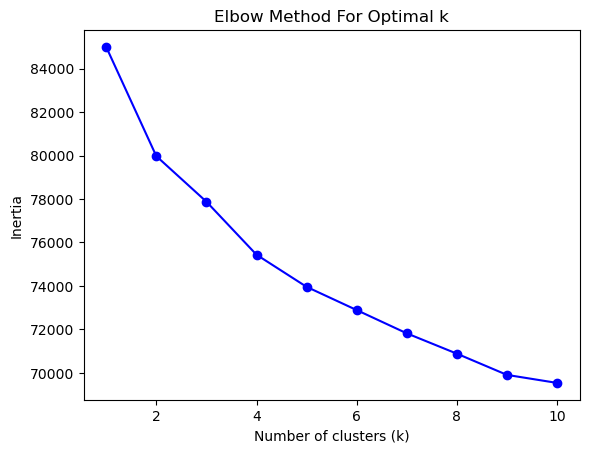

In [13]:
# Plotting the elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
# Based on the elbow method, let's assume the optimal number of clusters is 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\oladi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Step 4: Analyze clusters for specific insurance products
# Find the average characteristics of each cluster
cluster_analysis = df.groupby('Cluster').mean()

In [18]:
# Display the cluster analysis
cluster_analysis

,Customer_ID,Age,Gender,Income_Level,Occupation,Marital_Status,Education_Level,Location,Policy_Type,Coverage_Amount,Premium_Amount,Policy_Tenure_Years,Claim_History,Payment_Preferences,Customer_Support_Tickets,Marketing_Engagement,Customer_Feedback,Risk_Appetite,Renewal_Behavior
Cluster,,,,,,,,,,,,,,,,,,,
0,3506.638235,44.150588,0.479412,0.973529,2.459412,1.463529,1.532941,1.504118,2.057059,52728.661765,1058.338235,5.455294,1.000000,0.484118,2.527059,1.035294,1.033529,1.028235,1.032941
1,3514.418605,43.806610,0.502448,1.026928,2.432069,1.517136,1.454712,1.511016,1.940636,51672.758262,1056.004284,5.509180,0.000000,0.493268,2.546512,1.017136,1.000000,1.006120,0.993880
2,3480.585234,44.204082,0.507803,1.021609,2.506603,1.522809,1.518607,0.000000,2.006603,52871.284514,1073.870348,5.404562,0.506603,0.484994,2.526411,1.010204,1.004202,0.990996,0.992197


In [19]:
# Step 5: Find which clusters have higher potential for specific insurance products
# Analyze clusters by Policy_Type
product_potential = df.groupby(['Cluster', 'Policy_Type']).size().unstack().fillna(0)

In [21]:
# Display the product potential for each cluster
product_potential

Policy_Type,0,1,2,3,4
Cluster,,,,,
0,317,326,359,339,359
1,353,343,302,320,316
2,317,343,359,306,341
